### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [140]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform PCA
from sklearn.decomposition import PCA

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")


## Data Overview

- Observations
- Sanity checks

In [52]:
# loading the dataset
data = pd.read_csv("stock_data.csv")

#### Checking the shape of the dataset

In [53]:
data.shape

(340, 15)

- The dataset has 340 rows and 15 columns

#### Displaying few rows of the dataset

In [54]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


#### Creating a copy of original data

In [55]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [56]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

In [57]:
df.rename(columns={'Security': 'Company'}, inplace=True)

#### Checking the data types of the columns for the dataset

In [59]:
# let's look at the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker_Symbol                 340 non-null    object 
 1   Company                       340 non-null    object 
 2   GICS_Sector                   340 non-null    object 
 3   GICS_Sub_Industry             340 non-null    object 
 4   Current_Price                 340 non-null    float64
 5   Price_Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash_Ratio                    340 non-null    int64  
 9   Net_Cash_Flow                 340 non-null    int64  
 10  Net_Income                    340 non-null    int64  
 11  Earnings_Per_Share            340 non-null    float64
 12  Estimated_Shares_Outstanding  340 non-null    float64
 13  P/E_R

- Company, GICS_Sector and GICS_Sub_Industry are of type object.
- There are no missing values in the dataset.

#### We won't need Ticker Symbol for analysis, so let's drop this column.

In [61]:
df.drop("Ticker_Symbol", axis=1, inplace=True)

#### Checking for duplicates

In [62]:
# let's check for duplicate observations
df.duplicated().sum()

0

- There is 0 duplicate observation. 

### Statistical summary of the dataset

In [63]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sub_Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current_Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price_Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash_Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net_Cash_Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0
Net_Income,340.0,NaN,NaN,NaN,1494384602.941176,3940150279.327936,-23528000000.0,352301250.0,707336000.0,1899000000.0,24442000000.0


Observations

- The "GICS Sector" column has 11 unique values and the "GICS Sub Industry" column has 104 unique values.
- The most common sector is "Industrials," appearing 53 times.
- The most common sub-industry is "Oil & Gas Exploration & Production," appearing 16 times.
- The average current stock price is $80.86. 
- The max change in the stock price is 55% in 13 weeks.

In [64]:
df.head()

,Company,GICS_Sector,GICS_Sub_Industry,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
0,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [65]:
# Let's see unique values
cols = df.columns

for col in cols:
    print("Unique values in the column '{}' are \n\n".format(col), df[col].unique())
    print("-" * 100)

Unique values in the column 'Company' are 

 ['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Apache Corporation' 'Anadarko Petroleum Corp' 'Amphenol Corp'
 'Arconic Inc' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'Broadcom' 'American Water Works Company Inc' 'American Express Co'
 'Boeing Company' 'Bank of America Corp' 'Baxter International Inc.'
 'BB&T Corporation' 'Bard (C.R.) Inc.' 'Baker Hughes Inc'

- Seems there is no variable need correction.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate Analysis

In [67]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

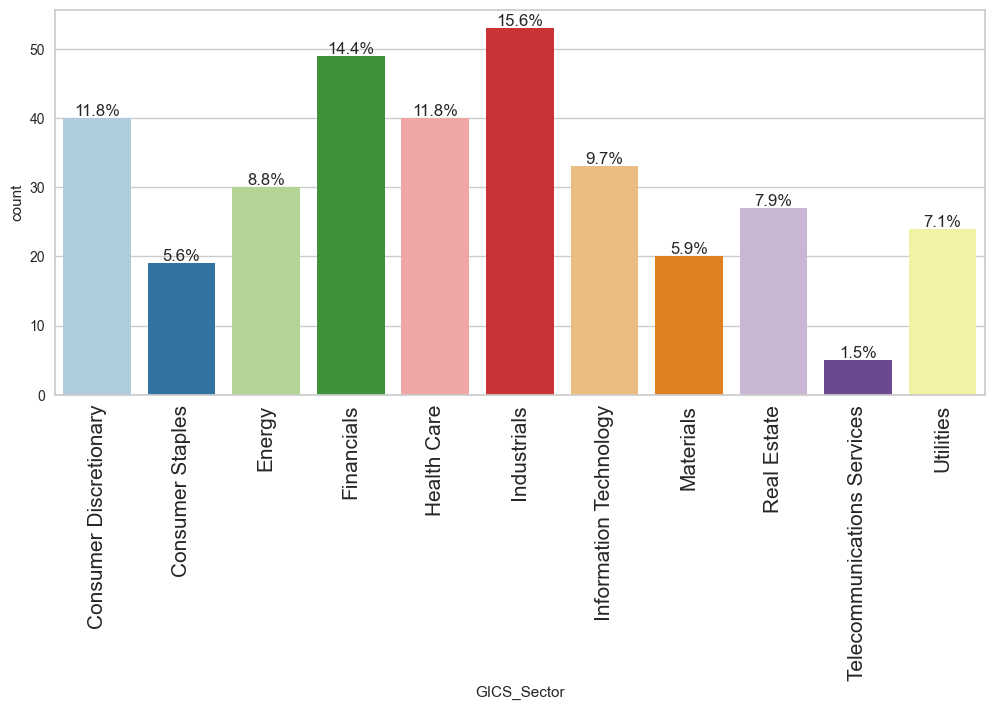

In [69]:
labeled_barplot(df, "GICS_Sector", perc=True)

Observations:

- 15.6% companies in the data are in the industrials, followed by companies in the financials industry (14.4%).
- Companies in the Telecommunications services industry has the least data which is 1.5%. 

In [70]:
#function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

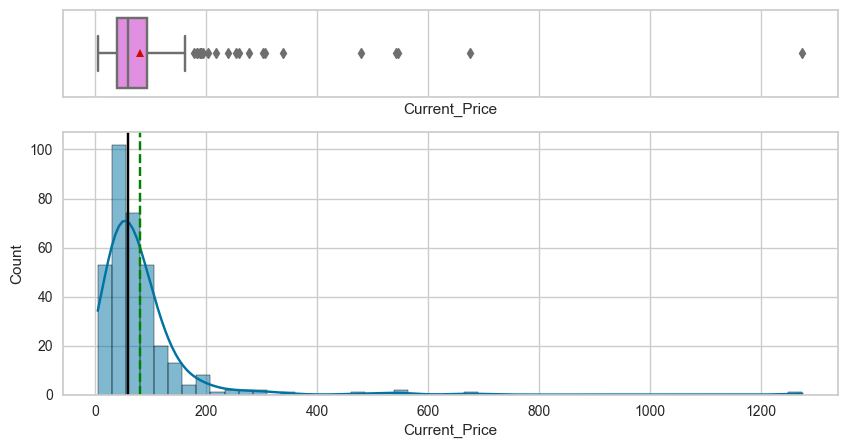

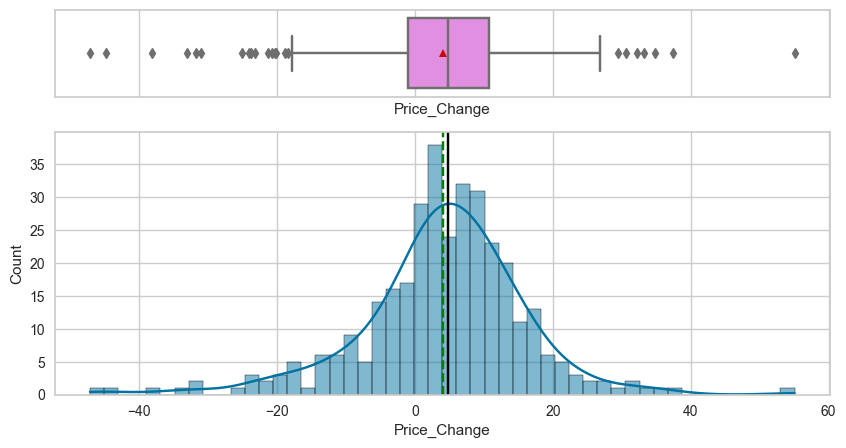

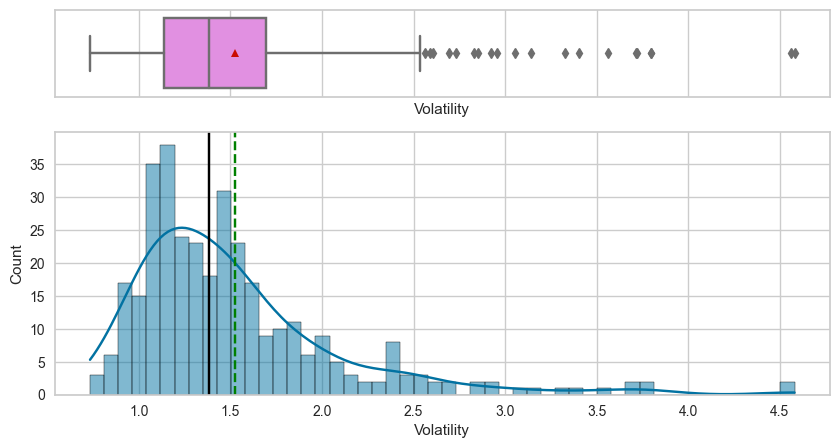

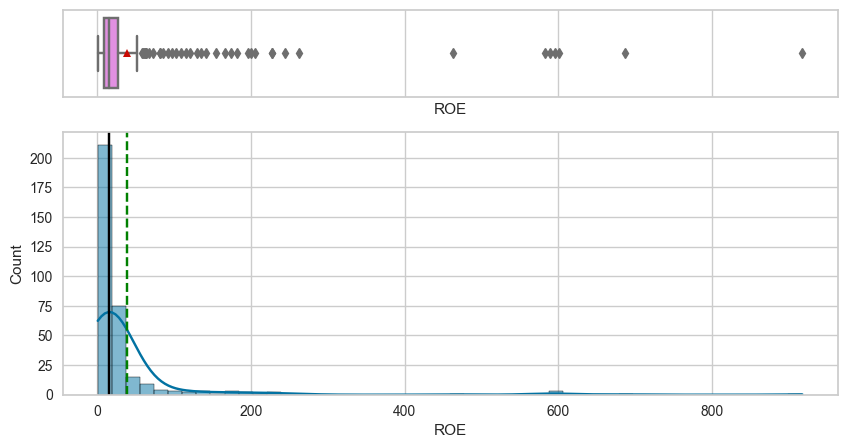

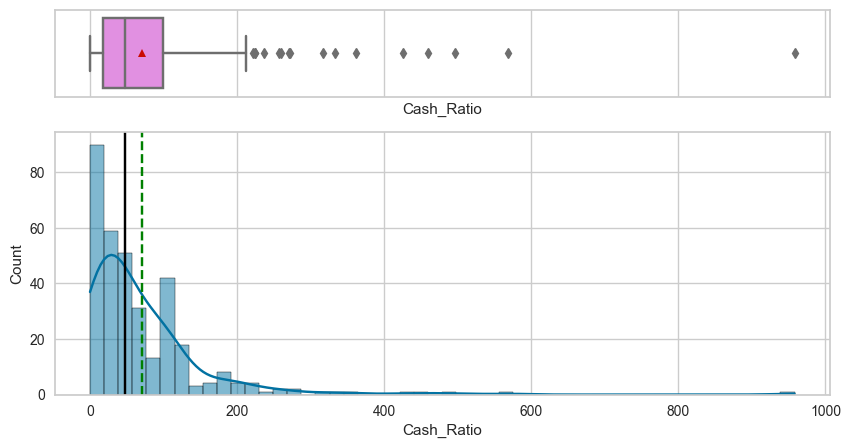

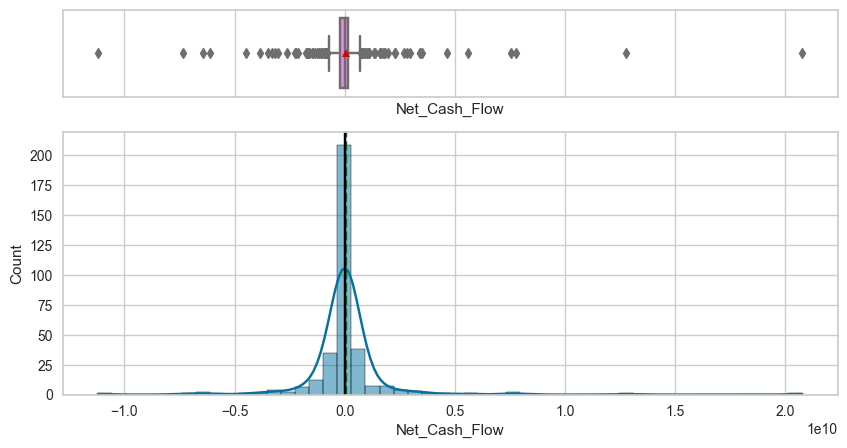

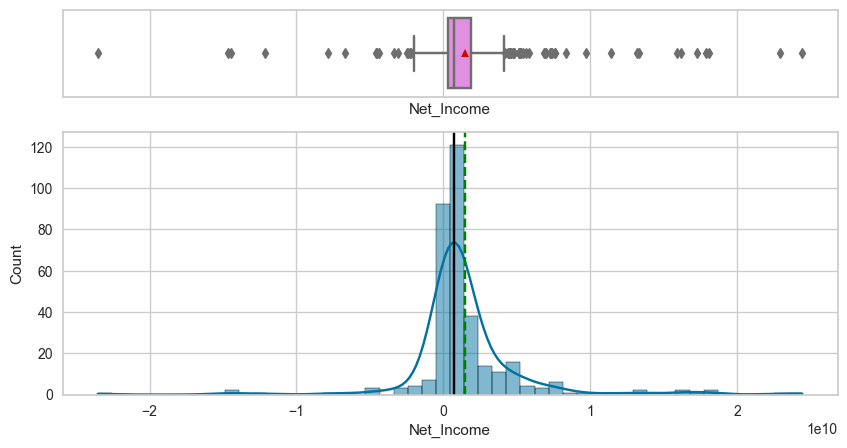

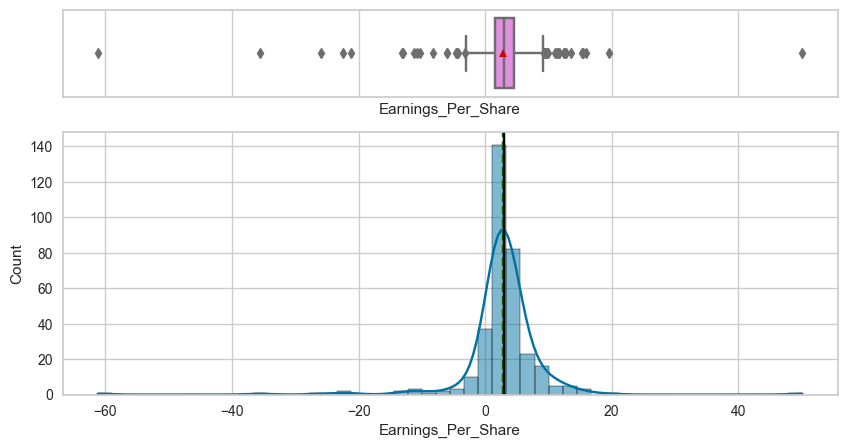

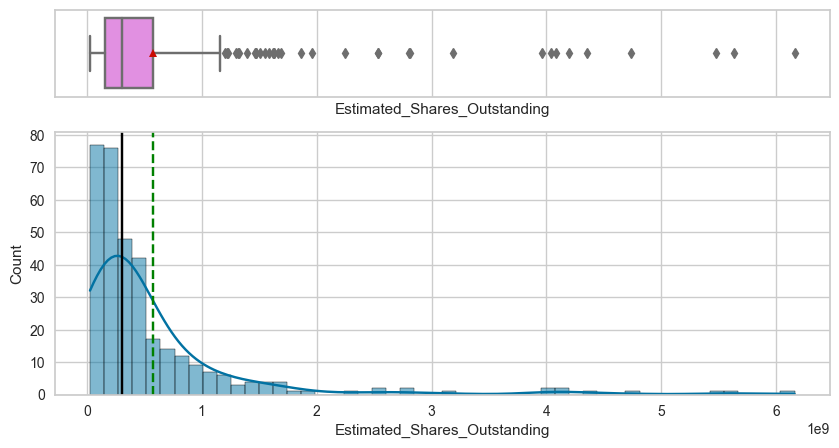

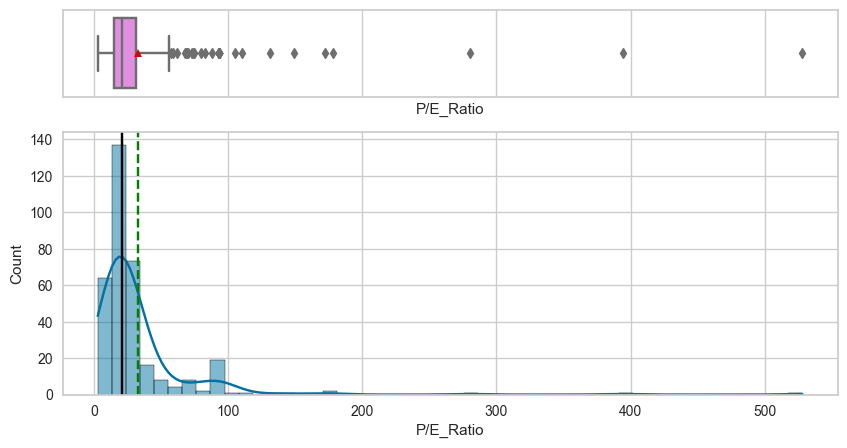

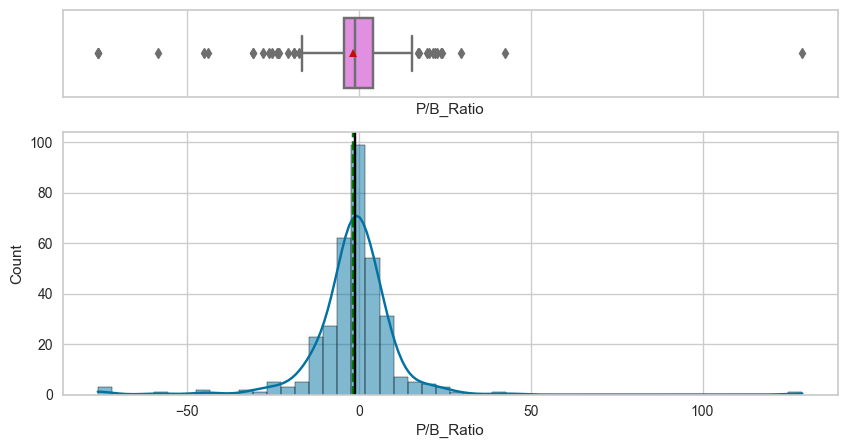

In [71]:
# selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(df, item, bins=50, kde=True, figsize=(10, 5))

Observations:
    
- Variables like current_price, Volatility, Roe, Cash_Ratio, estimated_Shares_Outstanding and P/E_Ratio are right-skewed and have extreme upper outliers.

- Price_Change and Net_Income are almost normally distributed.

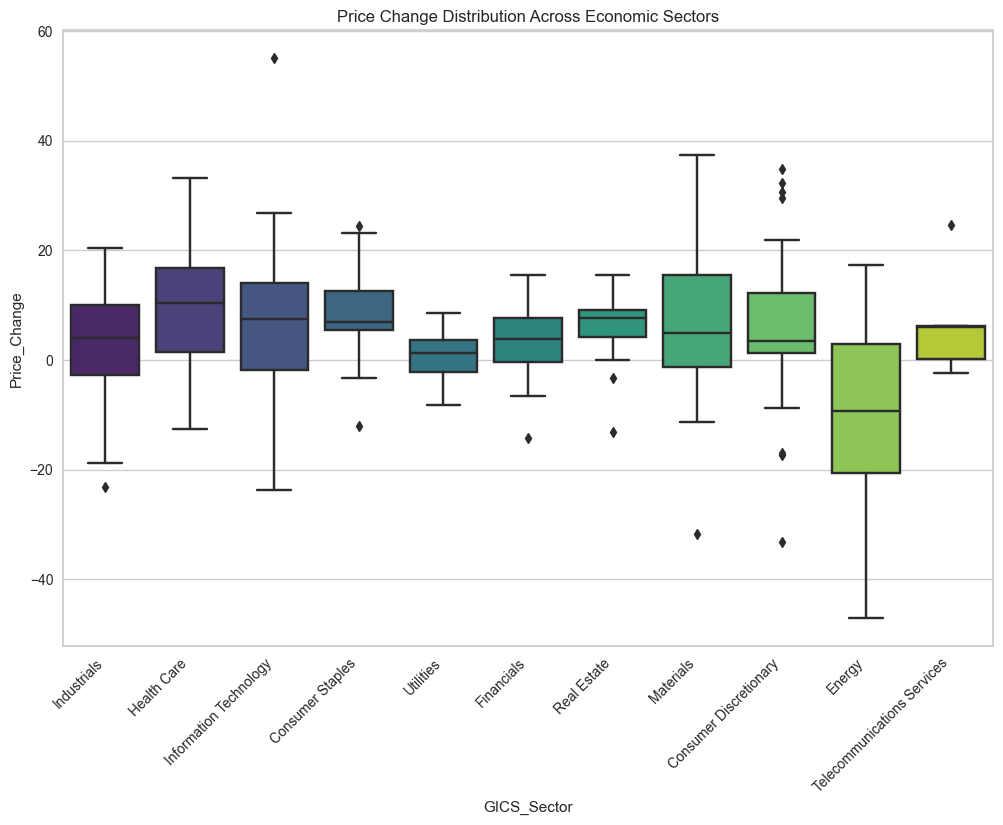

The economic sector with the maximum average price increase is 'Health Care' with an average increase of 9.59.


In [73]:
# Boxplot to visualize the distribution of Price Change across different sectors
plt.figure(figsize=(12, 8))
sns.boxplot(x='GICS_Sector', y='Price_Change', data=df, palette='viridis')
plt.title('Price Change Distribution Across Economic Sectors')
plt.xticks(rotation=45, ha='right')
plt.show()

# Calculate average price change for each sector
average_price_change_by_sector = df.groupby('GICS_Sector')['Price_Change'].mean()

# Identify the sector with the maximum average price increase
max_increase_sector = average_price_change_by_sector.idxmax()
max_increase_value = average_price_change_by_sector.max()

# Display the result
print(f"The economic sector with the maximum average price increase is '{max_increase_sector}' with an average increase of {max_increase_value:.2f}.")

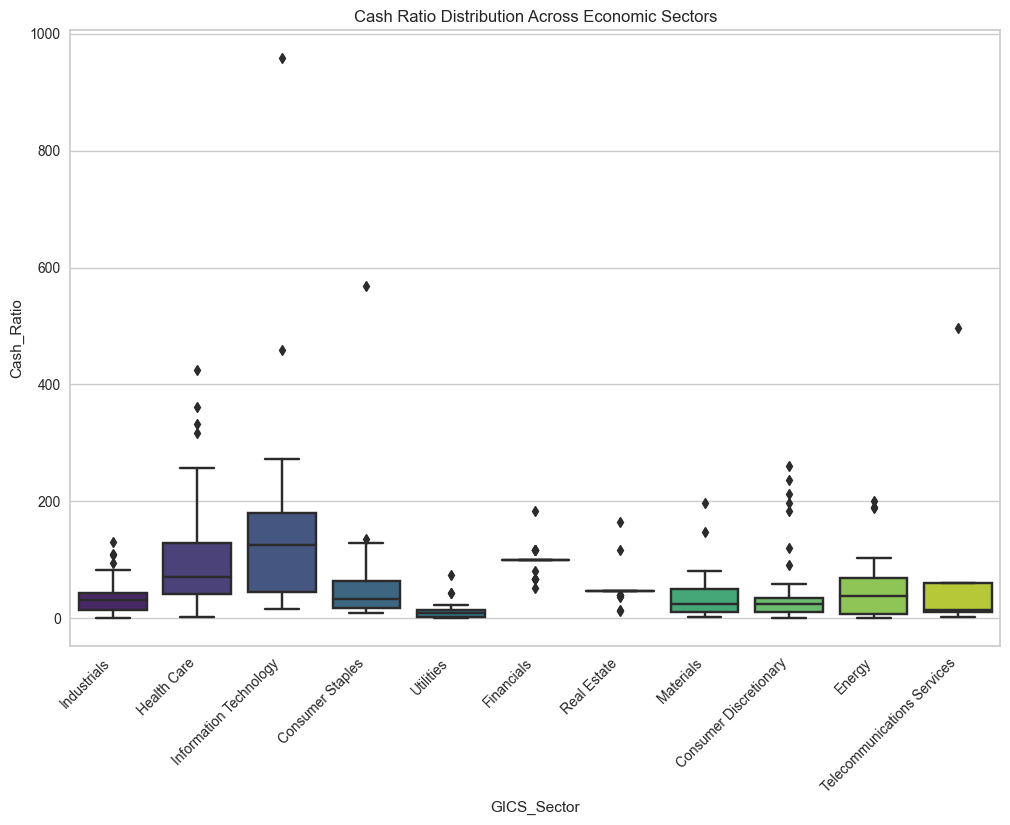

Average Cash Ratio Across Economic Sectors:
GICS_Sector
Consumer Discretionary          49.575000
Consumer Staples                70.947368
Energy                          51.133333
Financials                      98.591837
Health Care                    103.775000
Industrials                     36.188679
Information Technology         149.818182
Materials                       41.700000
Real Estate                     50.111111
Telecommunications Services    117.000000
Utilities                       13.625000
Name: Cash_Ratio, dtype: float64


In [74]:
# Boxplot to visualize the distribution of Cash Ratio across different sectors
plt.figure(figsize=(12, 8))
sns.boxplot(x='GICS_Sector', y='Cash_Ratio', data=df, palette='viridis')
plt.title('Cash Ratio Distribution Across Economic Sectors')
plt.xticks(rotation=45, ha='right')
plt.show()

# Calculate average cash ratio for each sector
average_cash_ratio_by_sector = df.groupby('GICS_Sector')['Cash_Ratio'].mean()

# Display the result
print("Average Cash Ratio Across Economic Sectors:")
print(average_cash_ratio_by_sector)

- Information Technology has the highest Cash Ratio of 149.8. Followed by Telecommunications Services of 117.0.

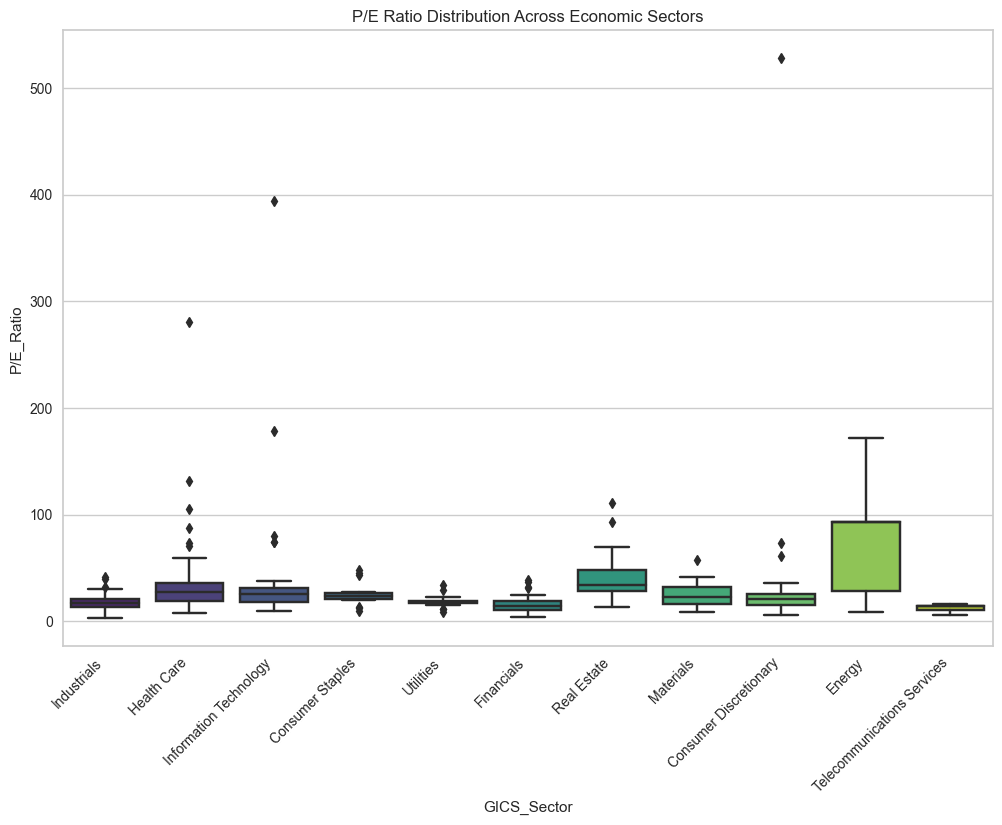

Average P/E Ratio Across Economic Sectors:
GICS_Sector
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Energy                         72.897709
Financials                     16.023151
Health Care                    41.135272
Industrials                    18.259380
Information Technology         43.782546
Materials                      24.585352
Real Estate                    43.065585
Telecommunications Services    12.222578
Utilities                      18.719412
Name: P/E_Ratio, dtype: float64


In [75]:
# Boxplot to visualize the distribution of P/E Ratio across different sectors
plt.figure(figsize=(12, 8))
sns.boxplot(x='GICS_Sector', y='P/E_Ratio', data=df, palette='viridis')
plt.title('P/E Ratio Distribution Across Economic Sectors')
plt.xticks(rotation=45, ha='right')
plt.show()

# Calculate average P/E ratio for each sector
average_pe_ratio_by_sector = df.groupby('GICS_Sector')['P/E_Ratio'].mean()

# Display the result
print("Average P/E Ratio Across Economic Sectors:")
print(average_pe_ratio_by_sector)

- Energy has the highest P/E Ratio of 72.9. Followed by Information Technology of 43.78.

### Bivariate Analysis

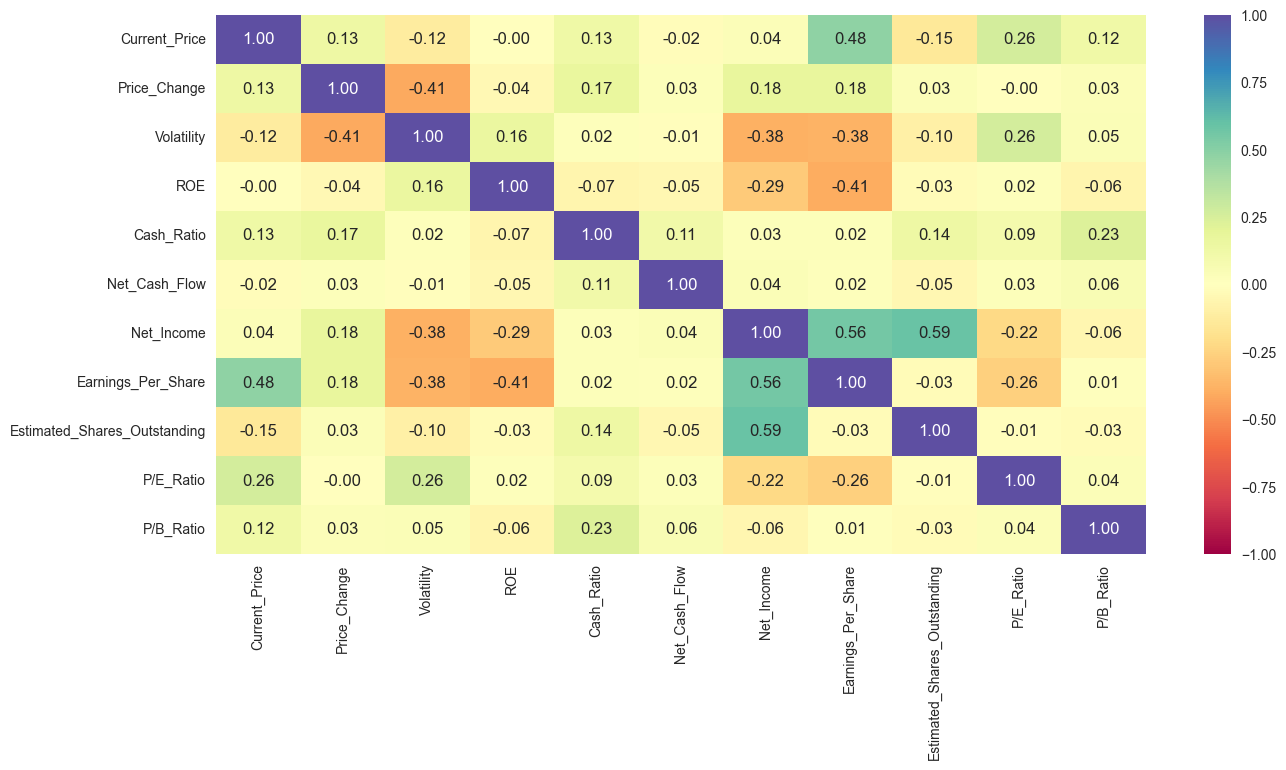

In [76]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observations:

- Net income has moderate correlation with earning per share and estimated shares outstanding.



## Data Preprocessing 

In [92]:
# scaling the dataset before clustering
sc = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sc.fit_transform(df.drop(["Company", "GICS_Sector","GICS_Sub_Industry"], axis=1)),
    columns=df.drop(["Company", "GICS_Sector","GICS_Sub_Industry"], axis=1).columns,
)
subset_scaled_df.head()


,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,K_means_segments
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653,-0.360543
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205,-0.360543
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941,-0.360543
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333,-0.360543
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196,2.043079


In [93]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.578271501062478
Number of Clusters: 2 	Average Distortion: 2.4191656796117535
Number of Clusters: 3 	Average Distortion: 2.300033466248705
Number of Clusters: 4 	Average Distortion: 2.199798151302064
Number of Clusters: 5 	Average Distortion: 2.1537184620735537
Number of Clusters: 6 	Average Distortion: 2.097379627854459
Number of Clusters: 7 	Average Distortion: 2.0252122811461306
Number of Clusters: 8 	Average Distortion: 2.0031486338981885


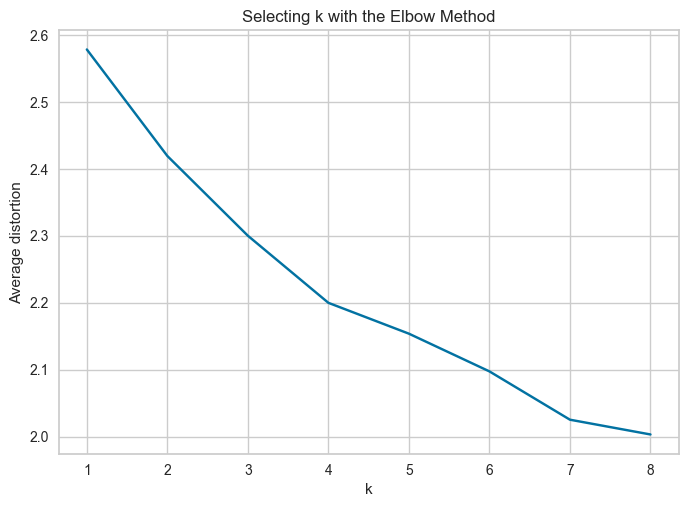

In [189]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

#### - Appropriate value for k seems to be 4 or 5.

#### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.4444852042201302)
For n_clusters = 3, the silhouette score is 0.4635402450784807)
For n_clusters = 4, the silhouette score is 0.4566644385713191)
For n_clusters = 5, the silhouette score is 0.4184178214369874)
For n_clusters = 6, the silhouette score is 0.42700705405178746)
For n_clusters = 7, the silhouette score is 0.42239944027827586)
For n_clusters = 8, the silhouette score is 0.41467723420763286)
For n_clusters = 9, the silhouette score is 0.2215759694169634)


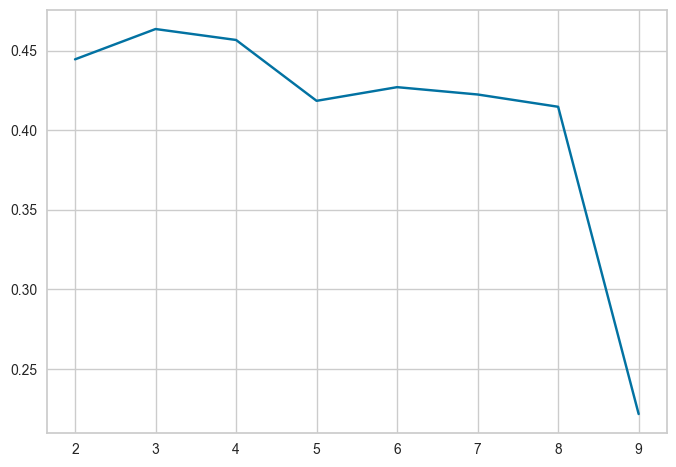

In [190]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

#### - We will choose 4 as value of k.

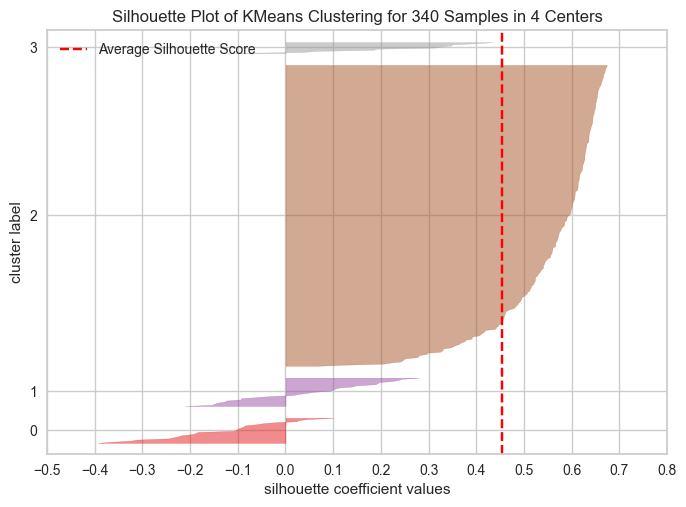

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [122]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

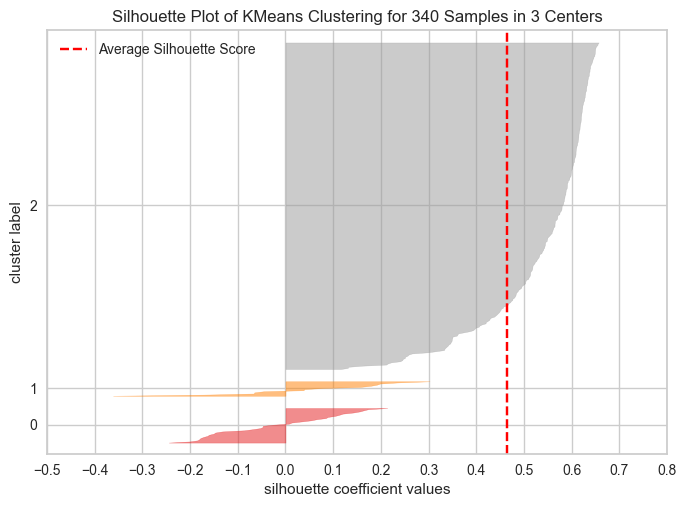

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [123]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [179]:
# let's take 4 as number of clusters as the silhouette score is high enough and there is knick at 4 in the elbow curve.
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [180]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

### Cluster Profiling

In [181]:
# Assuming 'K_means_segments' is a categorical column
numeric_columns = df.select_dtypes(include='number').columns
cluster_profile = df.groupby("K_means_segments")[numeric_columns].mean()


In [182]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("K_means_segments")["Current_Price"].count().values
)

In [183]:
# let's see the names of the companies in each cluster
for cl in df["K_means_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["Company"].unique())
    print()

In cluster 2, the following companies are present:
['Adobe Systems Inc' 'Alliance Data Systems' 'Applied Materials Inc'
 'Amgen Inc' 'Broadcom' 'Bank of America Corp' 'Celgene Corp.'
 'Chipotle Mexican Grill' 'Equinix' 'Edwards Lifesciences' 'Facebook'
 'First Solar Inc' 'Frontier Communications' 'Intel Corp.'
 'Intuitive Surgical Inc.' 'Monster Beverage'
 'Newmont Mining Corp. (Hldg. Co.)' 'Regeneron' 'TripAdvisor'
 'Vertex Pharmaceuticals Inc' 'Waters Corporation' 'Wynn Resorts Ltd'
 'Yahoo Inc.']

In cluster 0, the following companies are present:
['Alexion Pharmaceuticals' 'Amazon.com Inc' 'Netflix Inc.'
 'Priceline.com Inc']

In cluster 1, the following companies are present:
['Allegion' 'Apache Corporation' 'Chesapeake Energy'
 'Charter Communications' 'Colgate-Palmolive' 'Kimberly-Clark'
 'S&P Global, Inc.']

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co' 'Ameren Cor

In [184]:
#print number of stocks within each sector for all of the clusters
for k in range(0,df['K_means_segments'].nunique()):
    print('The number of stocks within each GICS Sector for Cluster '+str(k)+' are:')
    print(df[df['K_means_segments']==k]['GICS_Sector'].value_counts())
    print("   ")

The number of stocks within each GICS Sector for Cluster 0 are:
GICS_Sector
Information Technology         9
Health Care                    8
Consumer Discretionary         6
Financials                     1
Real Estate                    1
Telecommunications Services    1
Energy                         1
Consumer Staples               1
Materials                      1
Name: count, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 1 are:
GICS_Sector
Energy                    22
Information Technology     2
Materials                  1
Industrials                1
Name: count, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 2 are:
GICS_Sector
Industrials                    52
Financials                     45
Consumer Discretionary         33
Health Care                    31
Real Estate                    26
Utilities                      24
Information Technology         22
Materials                      18
Consumer Staples           

In [191]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightblue", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,K_means_segments,HC_Clusters,count_in_each_segments
K_means_segments,,,,,,,,,,,,,,
0,205.304596,13.724272,1.758503,23.000000,261.241379,1811142965.517241,1707740827.586207,4.931034,739451741.386897,82.670773,12.871724,0.000000,1.827586,29
1,35.165385,-16.390175,2.922214,110.961538,49.461538,-192318884.615385,-4041692307.692307,-9.849231,482610056.416923,78.934814,1.612922,1.000000,3.653846,26
2,73.206572,4.957346,1.384578,35.094203,52.250000,-4616173.913043,1558022757.246377,3.718207,438815338.236630,23.544020,-3.413888,2.000000,2.963768,276
3,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,3.000000,5.000000,9


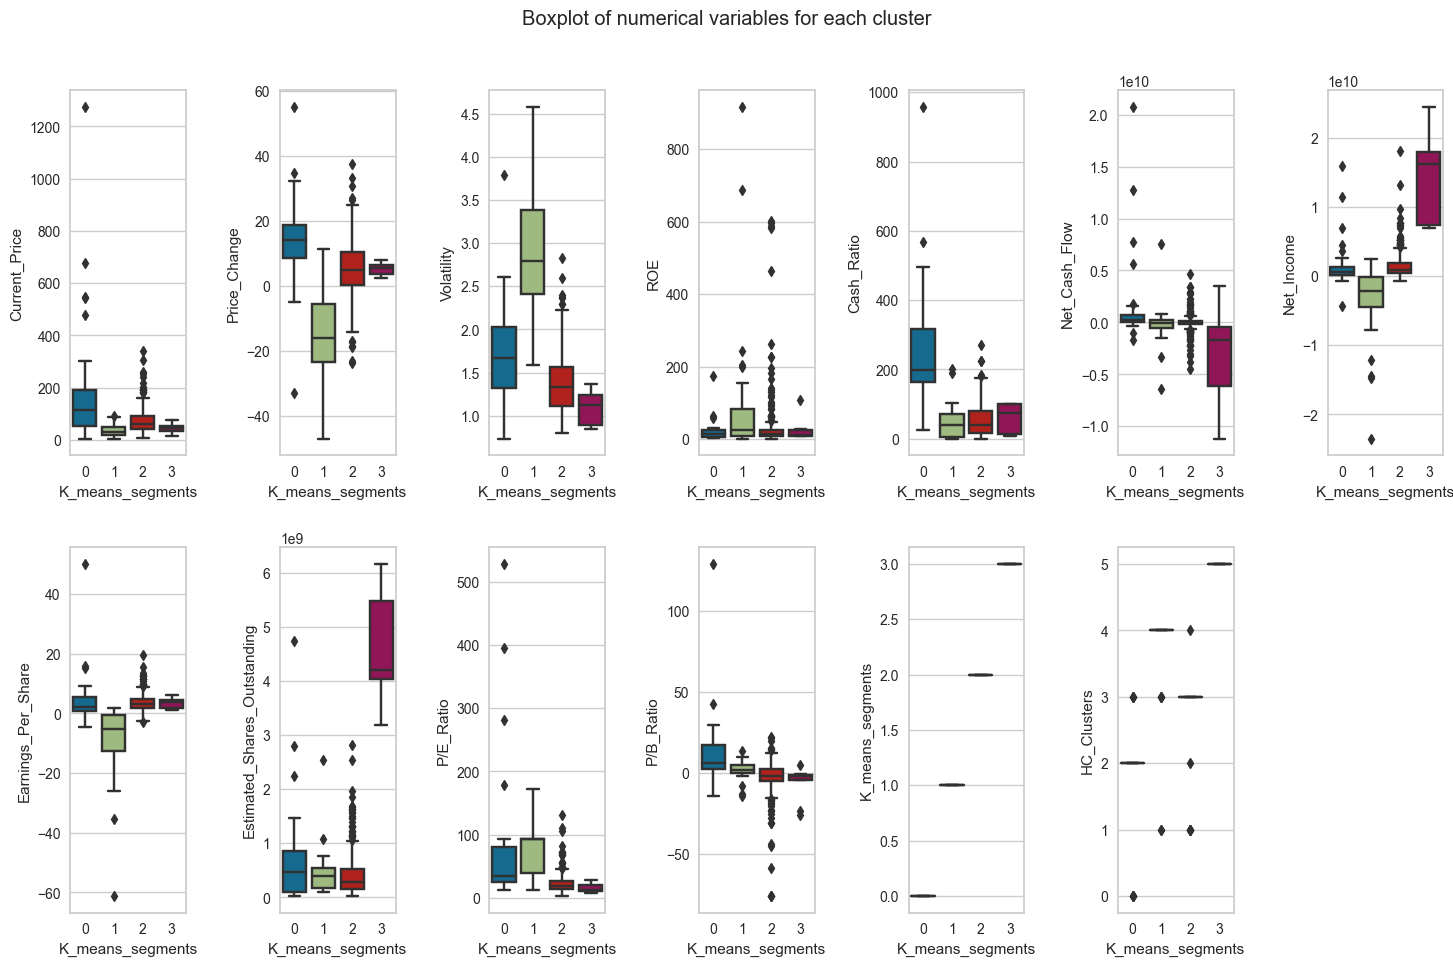

In [186]:
import math

plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

num_col = df.select_dtypes(include='number').columns  

n_vars = len(num_col)
rows = 2
cols = math.ceil(n_vars / rows)

for i, variable in enumerate(num_col):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(data=df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)
plt.show()

<Axes: xlabel='K_means_segments'>

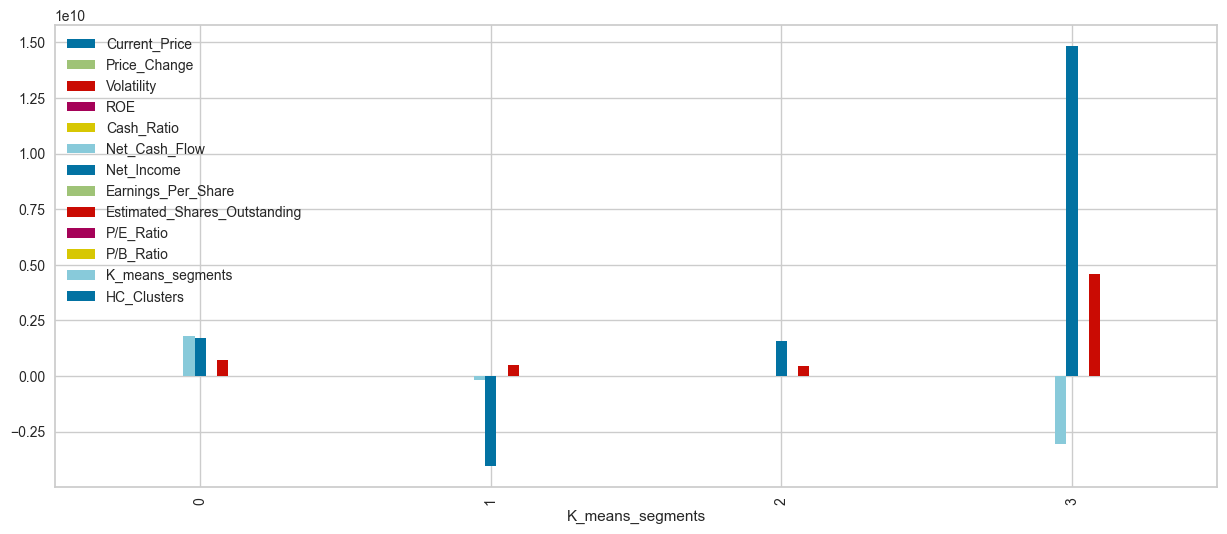

In [187]:
df.groupby("K_means_segments")[numeric_columns].mean().plot.bar(figsize=(15, 6))

### Insights

- #### Cluster 0:
 - Companies in this cluster has high values for features like Current Price and Price_change.
- Highest earnings per share.
- High cash ratio and high net cash flow.
- Both P/E and P/B Ratios are high.
- Moderate Volatility.
- #### Cluster 1:
- This cluster represents companies with higher Volatility and ROE.
- Current price is low.
- Price change , earnings per share and net income are negative.
- Low cash ratio. 
- #### Cluster 2:
- This cluster represents companies with moderate stock prices.
- Price change is low.
- Negative cash flow.
- Moderate ROE and cash ratio.
- Negative P/B Ratio.
- #### Cluster 3:
- Highest net income and estimated shares outstanding.
- Lowest cash value and volatility.

## Hierarchical Clustering

#### Checking Cophenetic Correlation

In [141]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correl

In [142]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


#### Let's explore different linkage methods with Euclidean distance only.

In [143]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [144]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


- We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.

### Checking Dendrograms

#### Let's see the dendrograms for the different linkage methods.

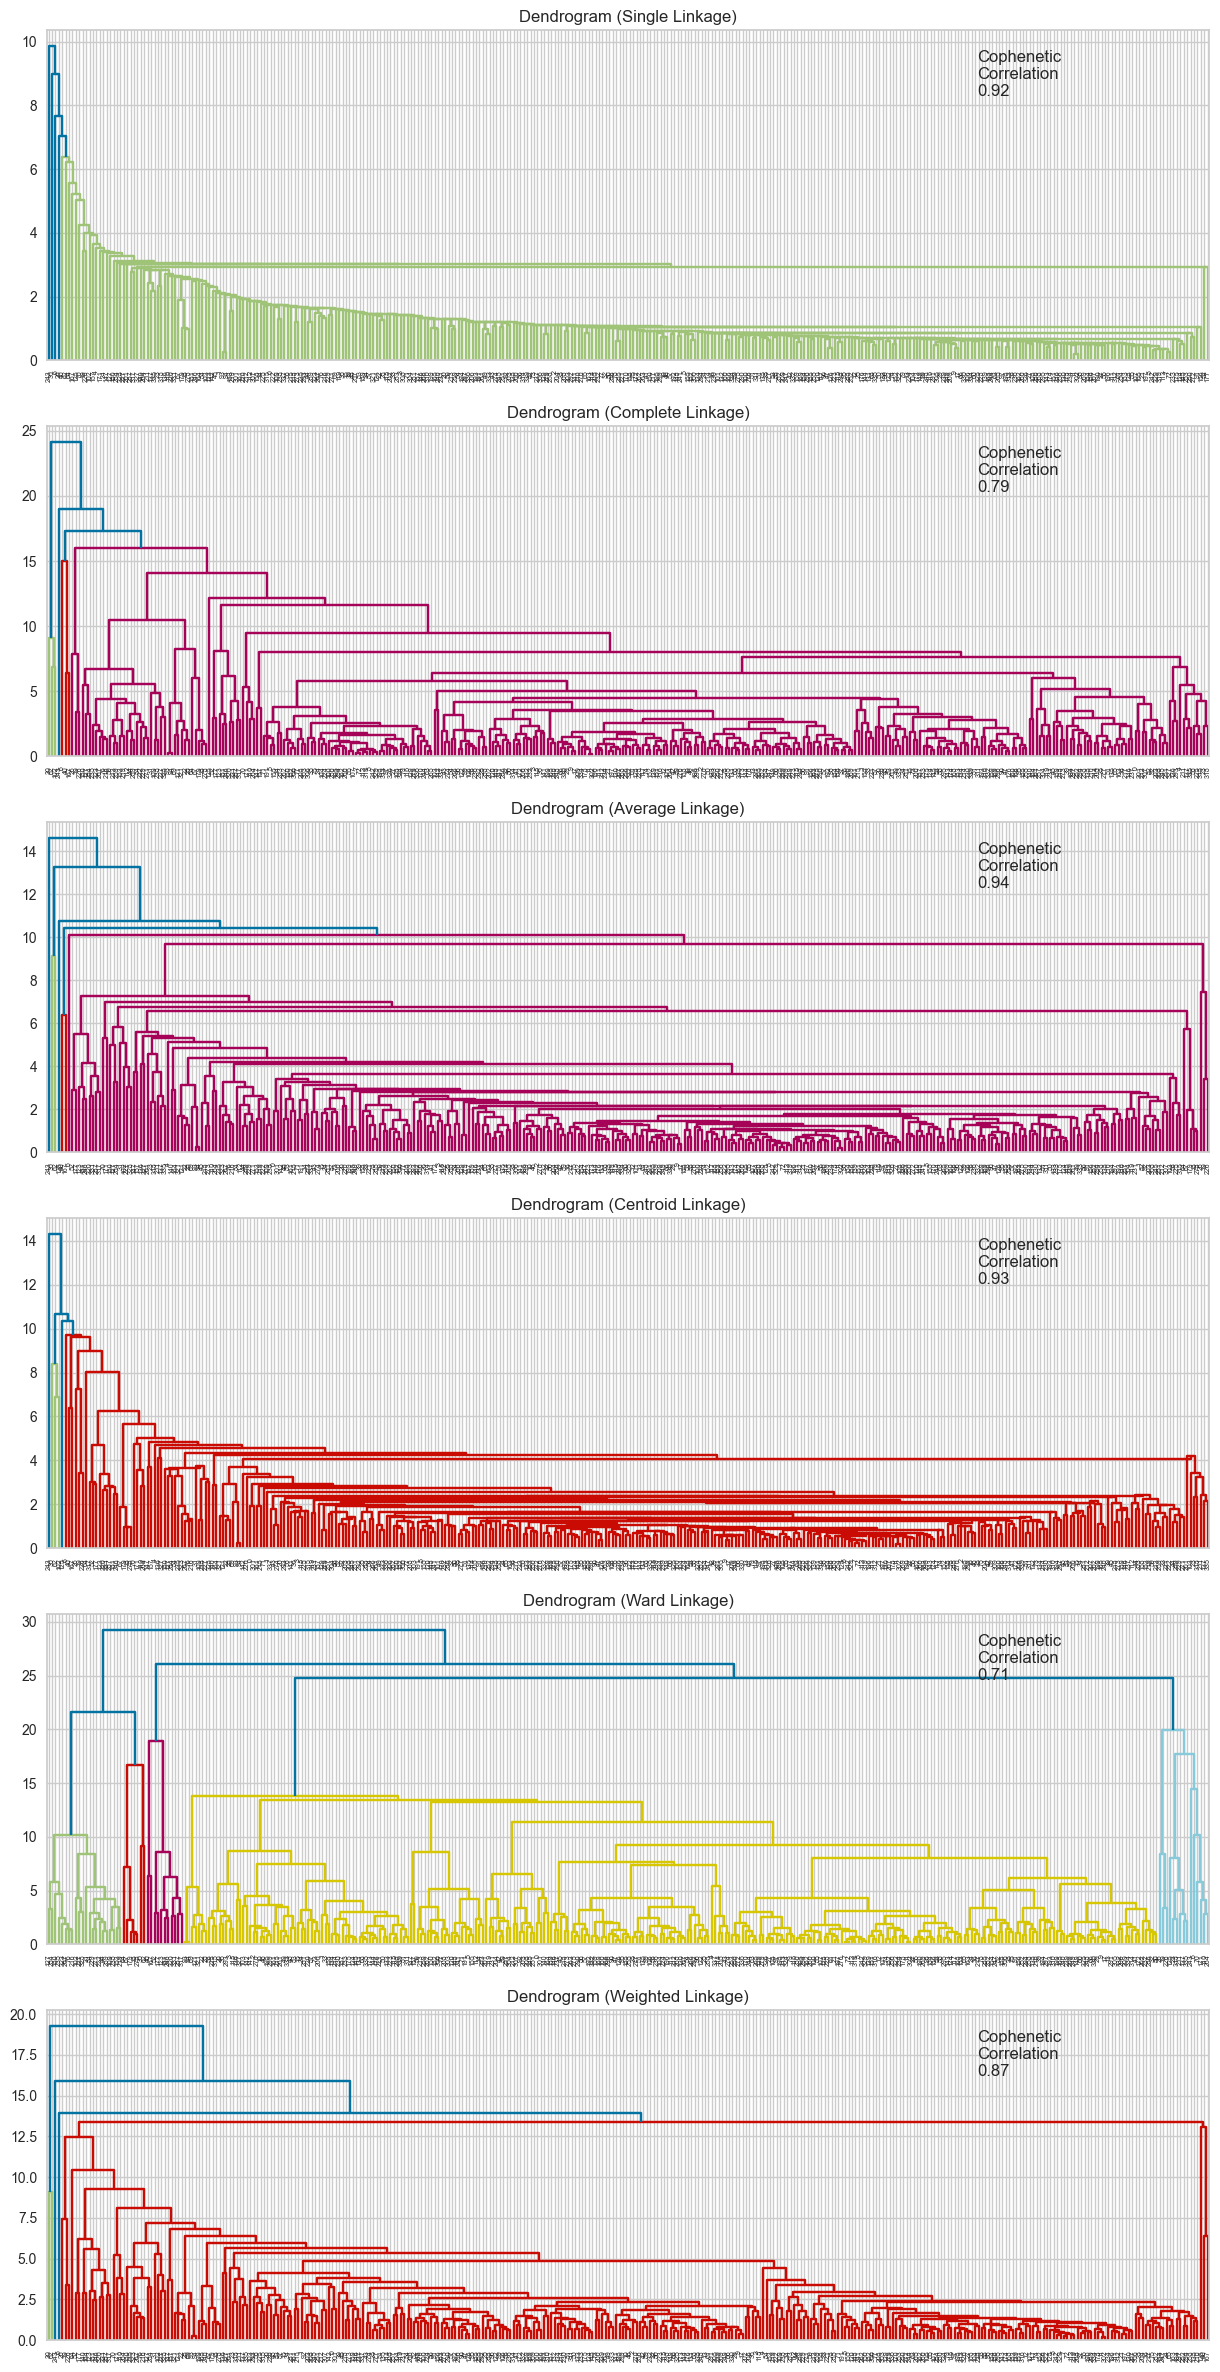

In [147]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with average linkage.
- 6 appears to be the appropriate number of clusters from the dendrogram for average linkage.

### Creating Model using sklearn

In [148]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=6)

In [149]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [151]:
cluster_profile = df.groupby("HC_Clusters")[numeric_columns].mean()

In [154]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Current_Price"].count().values
)

In [156]:
# let's see the names of the companies in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["Company"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.'
 'Aon plc' 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball 

We see that there are 3 clusters of one company, 2 cluster of two countries, and all the other countries are grouped into another cluster. This clustering does not look good as the clusters do not have enough variability.

Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 6 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.

### Creating Final Model

In [161]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=6)

In [162]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [164]:
cluster_profile = df.groupby("HC_Clusters")[numeric_columns].mean()

In [165]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Current_Price"].count().values
)

In [167]:
# let's see the names of the countries in each cluster
for cl in df["HC_Clusters"].unique():
    print(
        "The",
        df[df["HC_Clusters"] == cl]["Company"].nunique(),
        "companies in cluster",
        cl,
        "are:",
    )
    print(df[df["HC_Clusters"] == cl]["Company"].unique())
    print("-" * 100, "\n")

The 275 companies in cluster 3 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'American Water Works Company Inc'
 'American Express Co' 'Boeing Company' 'Baxter International Inc.'
 'BB&T Corporation' 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 'Carnival Corp.

Now the clusters seem to have more variability.

In [168]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightpink", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,563.992491,17.235667,1.839399,10.250000,125.500000,105834000.000000,853500250.000000,13.085000,287806305.492500,307.105187,-4.254889,2.000000,4
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,0.285714,7
2,152.566666,14.908086,1.769506,24.434783,281.913043,1747221304.347826,1866621956.521739,3.802174,759756952.867391,38.674023,16.027369,1.739130,23
3,72.421687,4.563230,1.403434,25.218182,55.014545,72801872.727273,1572467469.090909,3.728564,445003946.148764,24.188244,-2.966949,0.061818,275
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,0.954545,22
5,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,3.000000,9


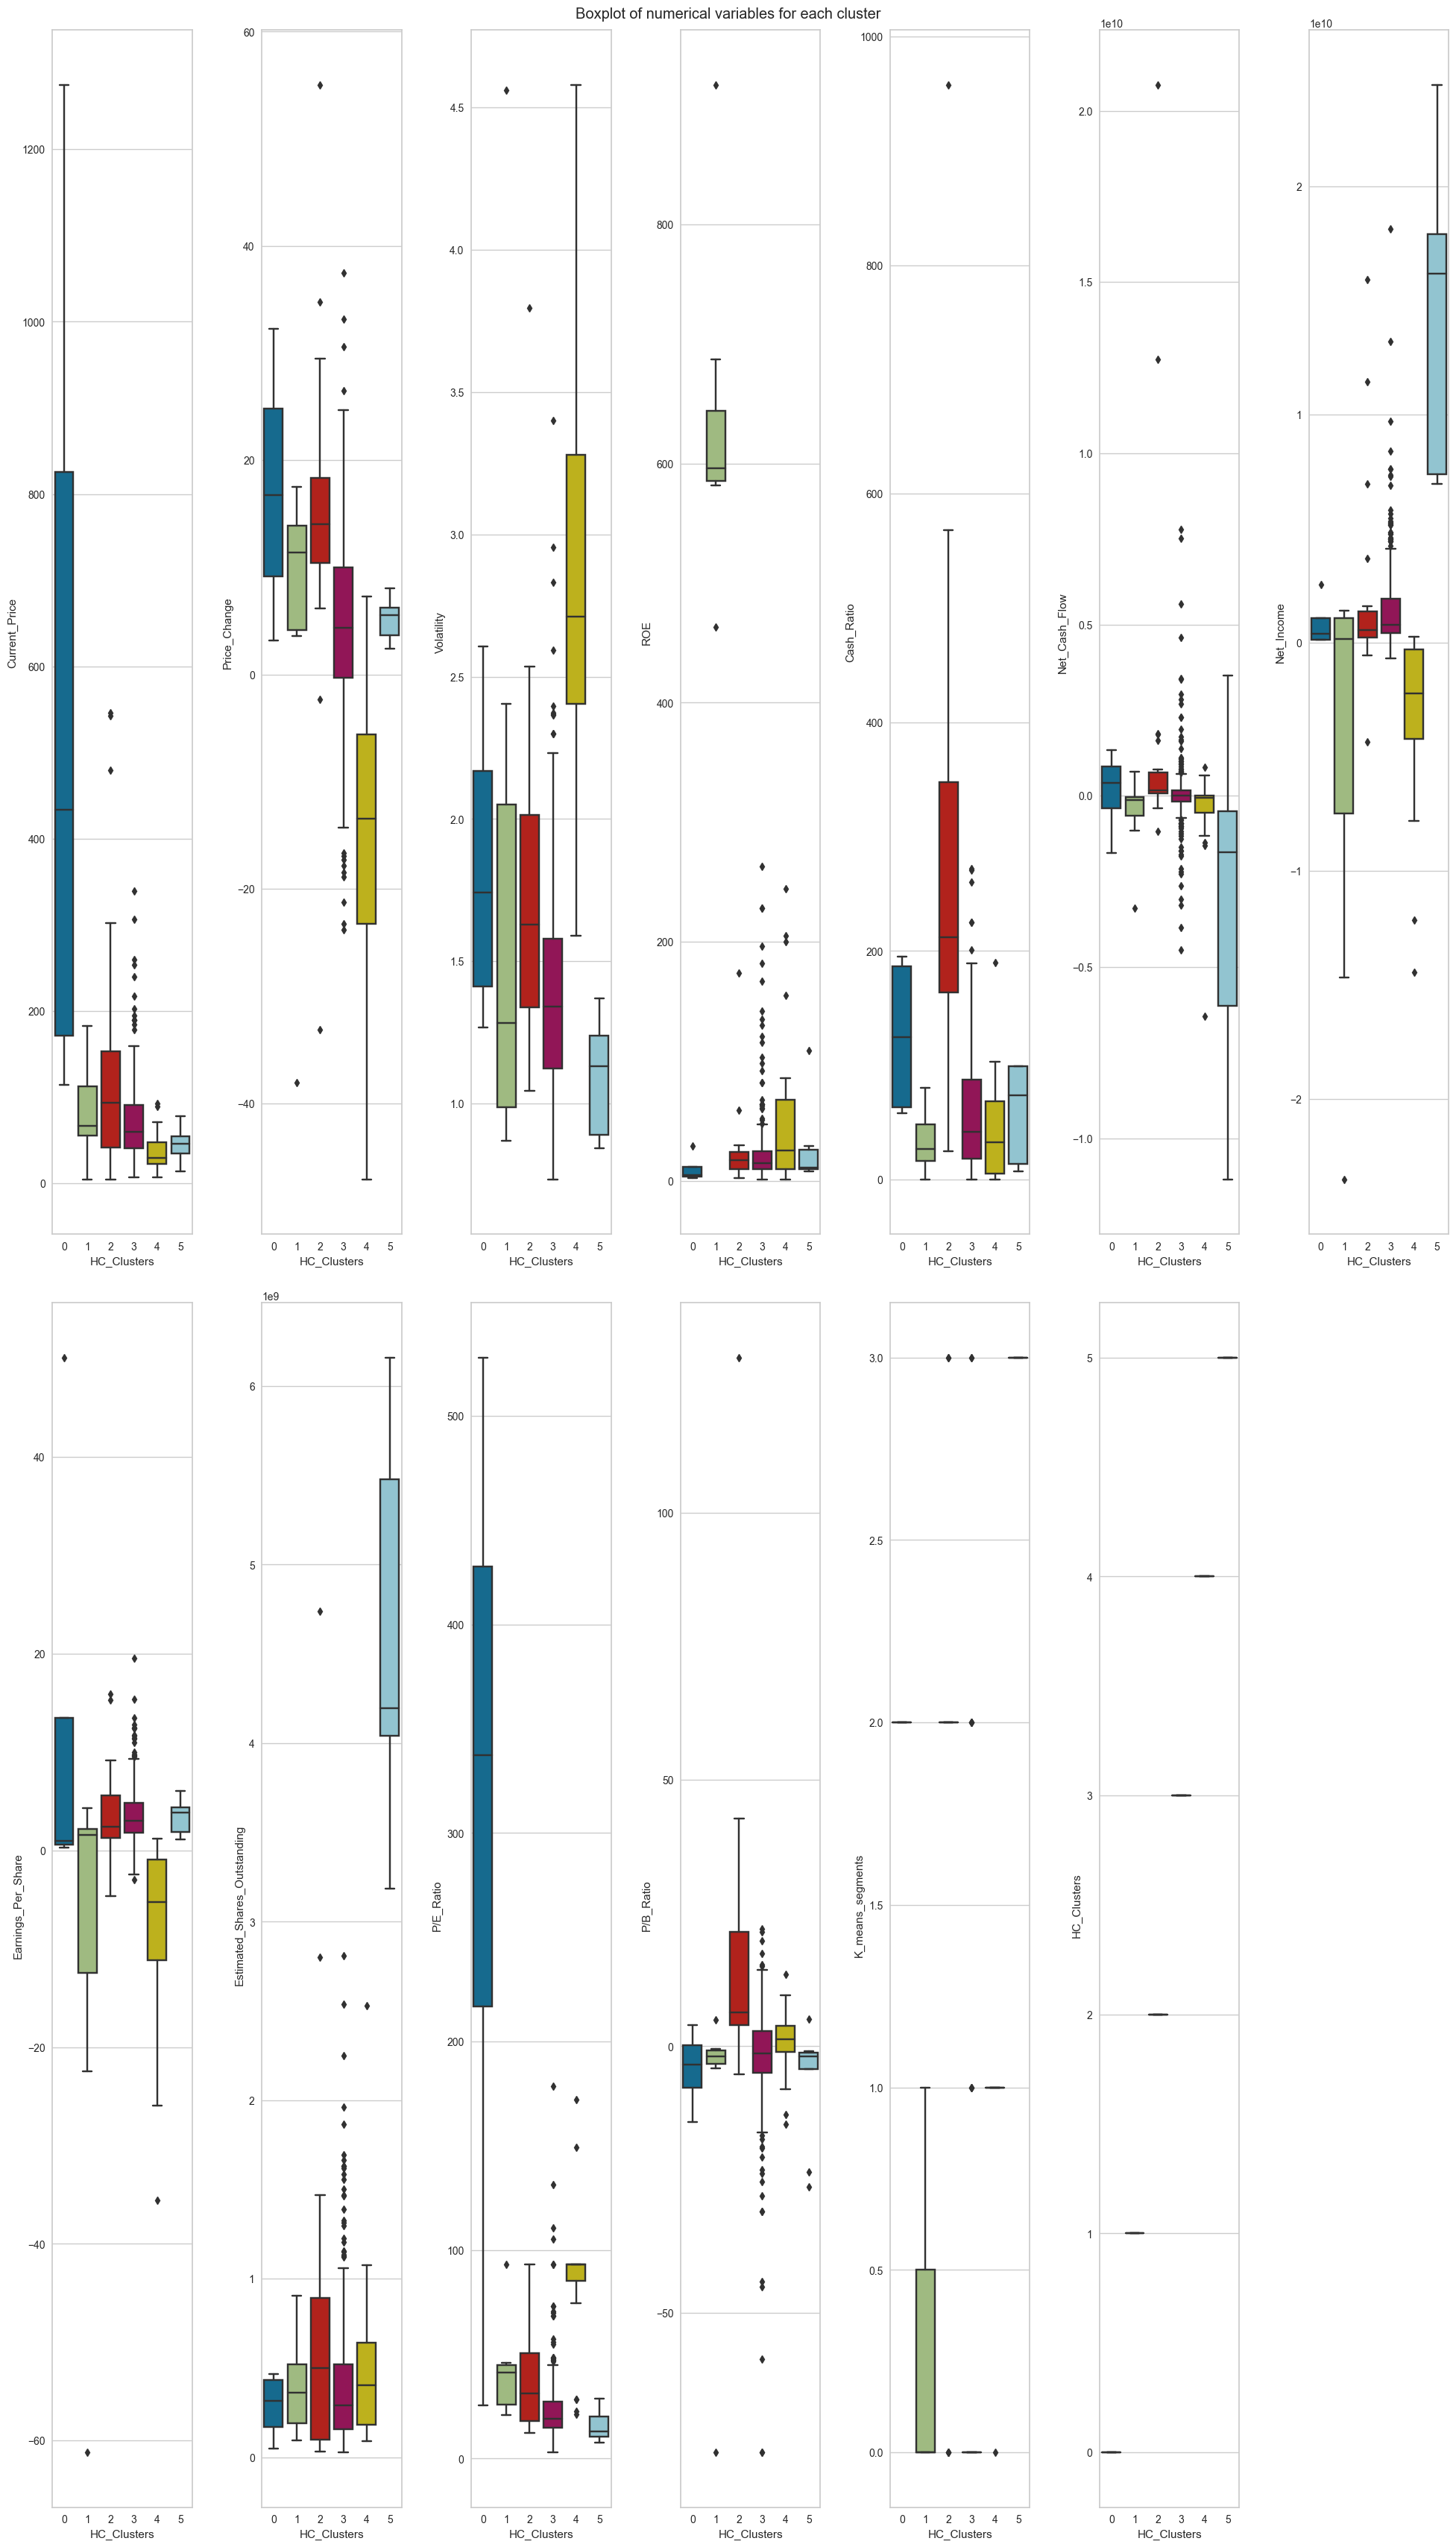

In [169]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of numerical variables for each cluster")

num_col = df.select_dtypes(include='number').columns 

n_vars = len(num_col)
rows = 2
cols = math.ceil(n_vars / rows)

for i, variable in enumerate(num_col):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(data=df, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)
plt.show()

### Insights

- #### Cluster 0:
- There are 4 companies in this cluster.
- Highest in current price, price change and Earinings per share.
- Low ROE.
- Negative P/B Ratio which shows potential financial issues.
- High P/E Ratio: Indicates that investors are willing to pay a high price relative to earnings for these stocks.

    
- #### Cluster 1:
- There are 7 companies in this cluster.
- Moderate Current Price, Price Change, Cash Ratio and Estimated Shares Outstanding.
- These companies have relatively volatile stock prices.
- Very High ROE: Indicates very high Return on Equity.
- Negative Net Cash Flow: Indicates negative cash flow, potentially a concern.
- Very Low Net Income, Earnings Per Share and P/B Ratio.
    
 
- #### Cluster 2:
- The 23 companies in cluster 2.
- Moderate Current Price, High Positive Price Change, and Volatility.
- Moderate ROE.
- High Cash Ratio and Net Cash Flow.
- High Net Income, Earnings Per Share, Estimated Shares Outstanding.
- Moderate P/E Ratio, High P/B Ratio.

- #### Cluster 3:
- The 275 companies in this cluster.
- Low Current Price and Moderate Positive Price Change.
- Moderate Volatility, ROE, Cash Ratio and Net Cash Flow.
- High Net Income, Earnings Per Share.
- Moderate Estimated Shares Outstanding and P/E Ratio.
- Low P/B Ratio.

- #### Cluster 4:
- The 22 companies in cluster 4.
- Very Low Current Price and Very Low Negative Price Change.
- High Volatility and ROE.
- Moderate Cash Ratio.
- Negative Net Cash Flow.
- Very Low Net Income, Earnings Per Share.
- High Estimated Shares Outstanding.
- Moderate P/E Ratio, Low P/B Ratio.

- #### Cluster 5:
- The 9 companies in cluster 5.
-Moderate Current Price and Positive Price Change.
-Low Volatility.
- Moderate ROE, Cash Ratio and Earnings Per Share.
- Negative Net Cash Flow.
- Very High Net Income.
- High Estimated Shares Outstanding.
- Moderate P/E Ratio, High P/B Ratio.

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

Execution Time:
Both the KMeans and Agglomerative Clustering models demonstrated efficient execution, taking approximately 0.1 seconds to fit the dataset.

Both clustering techniques, K-means and Hierarchical Clustering, produced similar clusters. There was a predominant single cluster containing a majority of the stocks, while the remaining clusters varied in size, encompassing 7 to 29 stocks. The distinctness of clusters was comparable between the two techniques.







In the similar clusters produced by both K-means and Hierarchical Clustering, the number of observations ranged from 7 to 29 stocks. These clusters exhibited comparable sizes across both clustering algorithms.

5 clusters could be appropriate for each algorithm. This configuration provided distinct clusters with sufficient observations in each, allowing for effective differentiation of representative stock types within each cluster.

## Actionable Insights and Recommendations

- Given the identified clusters of stocks, consider a diversification strategy. Invest in a mix of stocks from different clusters to spread risk and potentially enhance returns.
- Pay attention to stocks within clusters that exhibit higher volatility or lower financial performance metrics. Implement risk management strategies for these stocks to mitigate potential losses.
- Explore the clusters in the context of GICS sectors. Understand which economic sectors are more prevalent in each cluster. This information can guide sector-specific investment decisions or sector-focused portfolio allocations.
- Emphasize financial indicators such as ROE, Cash Ratio, and Net Cash Flow to guide clients towards investments in companies with robust financial fundamentals.

